In [1]:
library(data.table)
library(Seurat)
library(sctransform)
library(patchwork)
library(ggplot2)
wd<-"/shen/shenlabstore3/neng/20201116_SHAREseq/post_processing"
setwd(wd)

In [2]:
rna.UMIs<-as.matrix(fread('files/rna.lib.hg38.UMIcounts.csv.gz'),rownames=1)

In [3]:
rna <- CreateSeuratObject(counts=rna.UMIs,project="WTC11.RNA",assay="RNA",min.cells=3, min.features=200)
rna[["percent.mt"]]<-PercentageFeatureSet(rna,pattern="^MT-")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
pdf('violinplots.pdf')
VlnPlot(rna, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
dev.off()

png 
  2

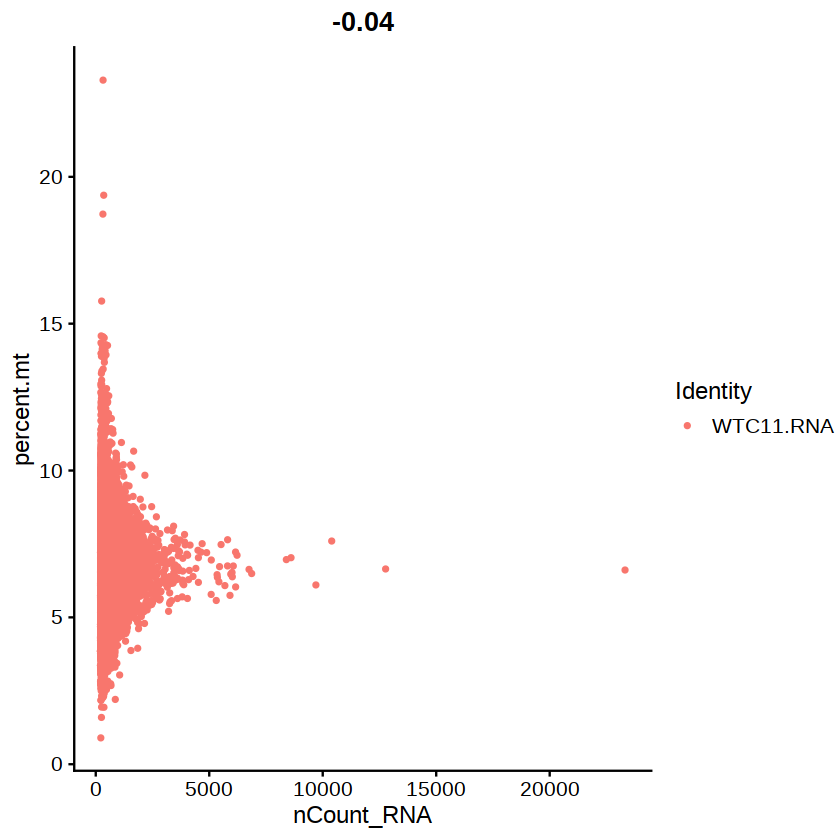

In [231]:
plot1 <- FeatureScatter(rna, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(rna, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

plot1

In [5]:
rna <- subset(rna, subset = nFeature_RNA > 400 & nFeature_RNA < 2000 & percent.mt < 8)

In [240]:
rna <- SCTransform(rna, verbose = FALSE, variable.features.n=2000, vars.to.regress='percent.mt')

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

In [6]:
rna

An object of class Seurat 
27519 features across 4019 samples within 1 assay 
Active assay: RNA (27519 features, 0 variable features)

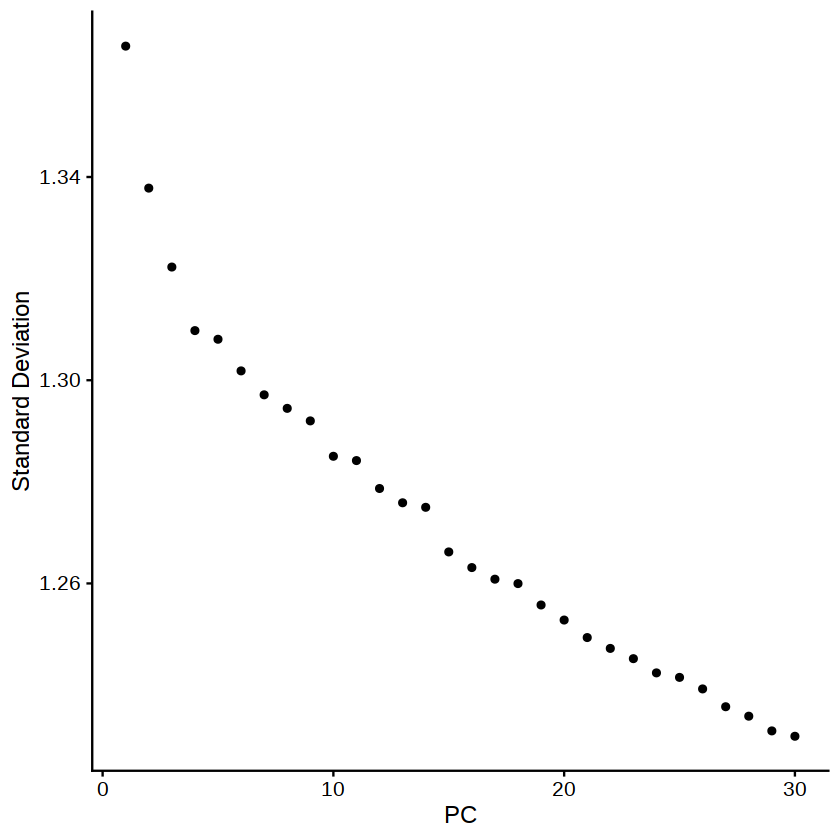

In [241]:
rna<- RunPCA(rna,verbose=FALSE)
ElbowPlot(rna,ndims=30)

In [242]:
rna <- FindNeighbors(rna, dims = 1:18, verbose=FALSE)
rna <- FindClusters(rna, verbose=TRUE,resolution=0.6)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4019
Number of edges: 149090

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5929
Number of communities: 9
Elapsed time: 0 seconds


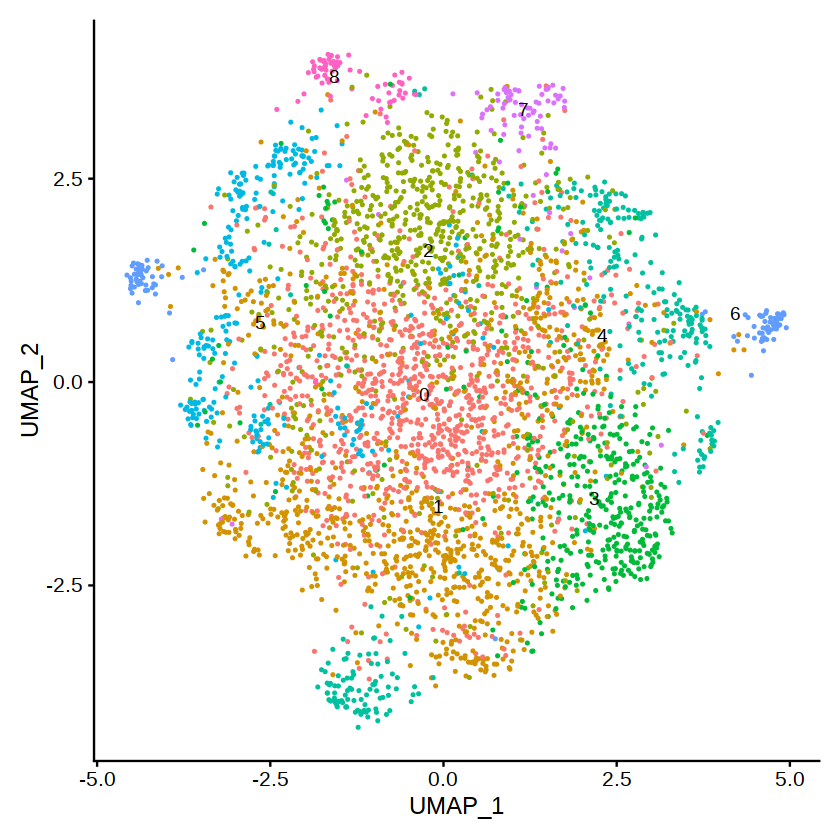

In [244]:
rna <- RunUMAP(rna, dims = 1:18, verbose = FALSE)
DimPlot(rna,label=TRUE) + NoLegend()

In [245]:
rna.markers <- FindAllMarkers(rna, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)
rna.markers %>% group_by(cluster) %>% top_n(n = 5, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8.802173e-100,0.3232019,0.997,0.969,1.812103e-95,0,GRID2
1.287985e-28,0.2032816,0.937,0.860,2.651575e-24,0,MALAT1
7.625086e-21,0.1856942,0.794,0.700,1.569776e-16,0,GPC6
8.428208e-17,0.1476712,0.701,0.582,1.735115e-12,0,AL589740.1
7.113973e-12,0.1318410,0.570,0.467,1.464554e-07,0,RYR2
6.265770e-75,0.3493080,0.715,0.431,1.289934e-70,1,LSAMP
9.712895e-51,0.2794348,0.554,0.311,1.999594e-46,1,LINC02163
2.117574e-18,0.1981634,0.547,0.418,4.359450e-14,1,BBS9
2.321933e-10,0.1251506,0.708,0.620,4.780164e-06,1,LRRTM4


In [277]:
features<-c("percent.mt","nFeature_RNA","GRID2","LSAMP","H1-3","H1-4",
            "GGH","SPON1-AS1","ZNF805","RASSF2","MALAT1",
            "DCBLD1","CCNE1","LINC02163",
           "TMEM44","MKI67")

pdf('Seurat.Plots.pdf')
x<-DimPlot(rna,label=TRUE) + NoLegend()
print(x)
for (feature in features) {
    p<-FeaturePlot(rna,features=feature)
    print(p)
}
dev.off()

png 
  2

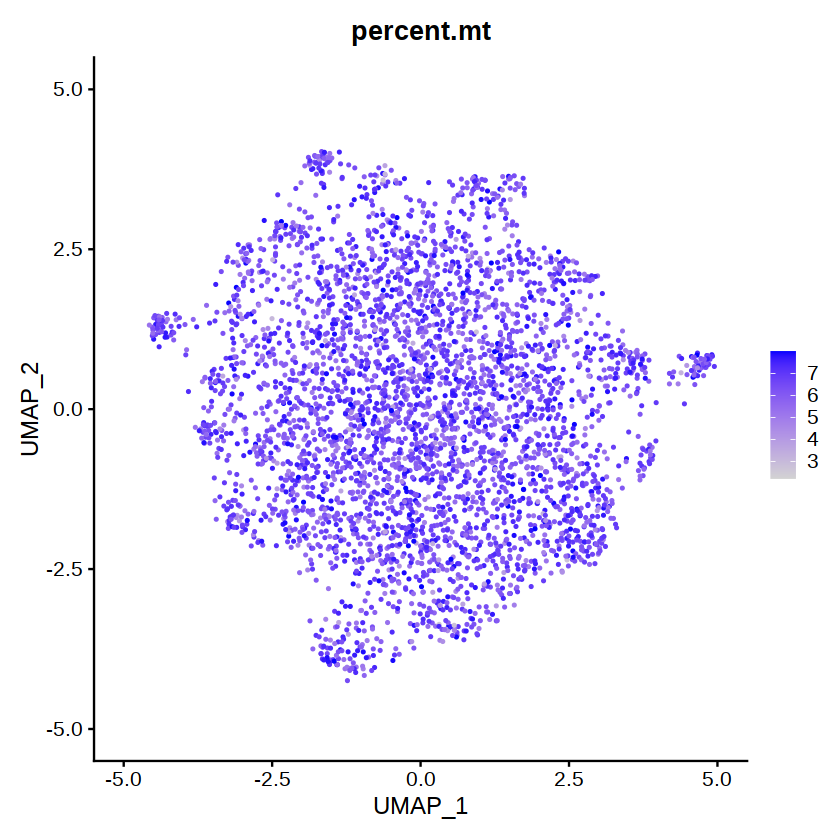

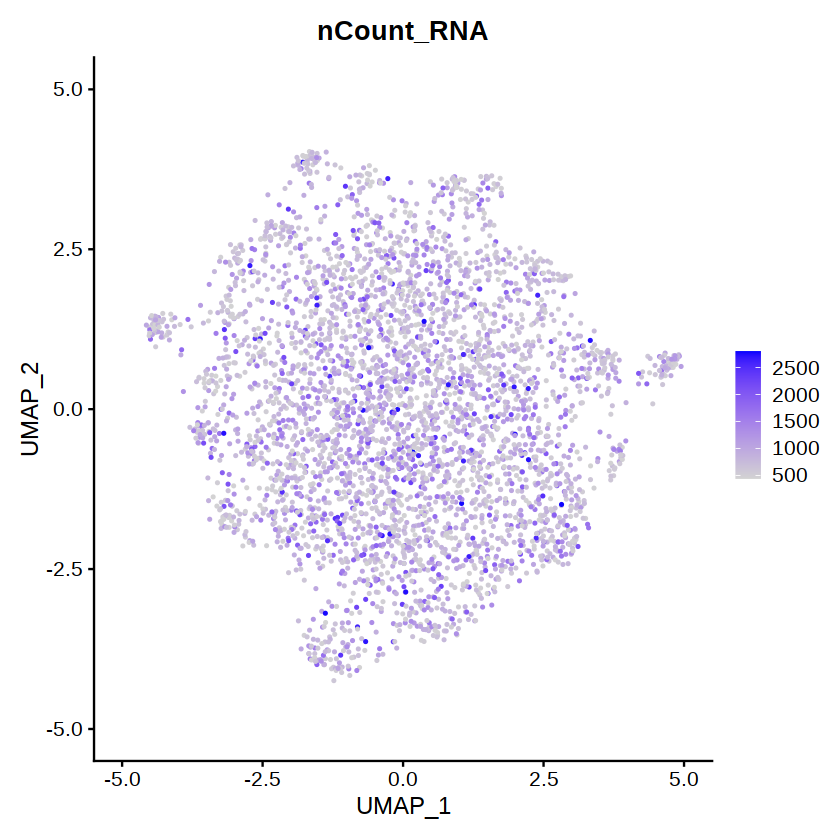

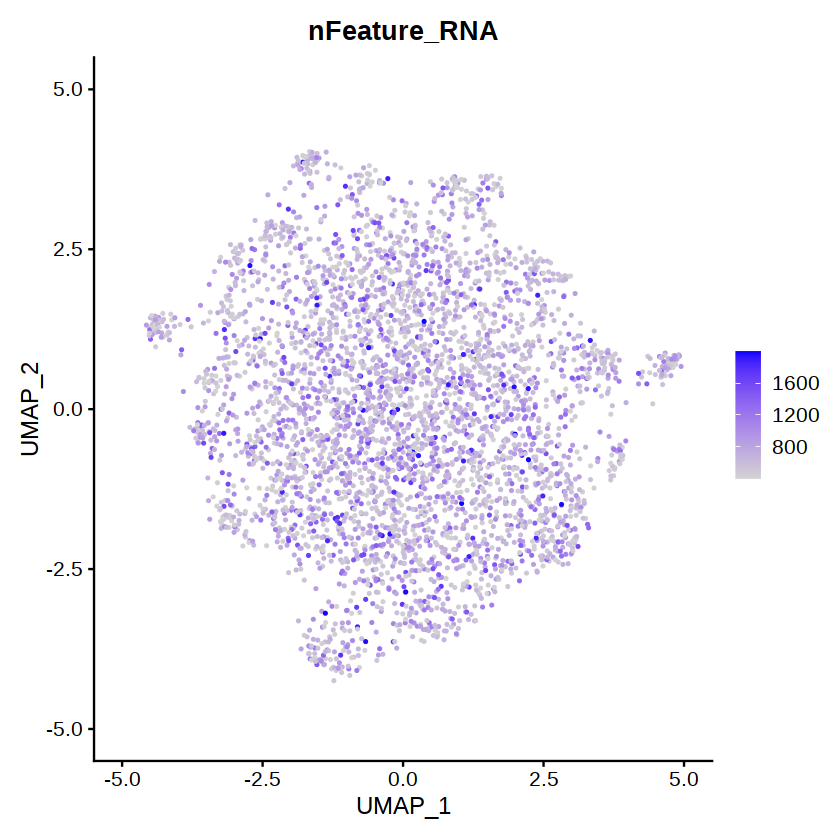

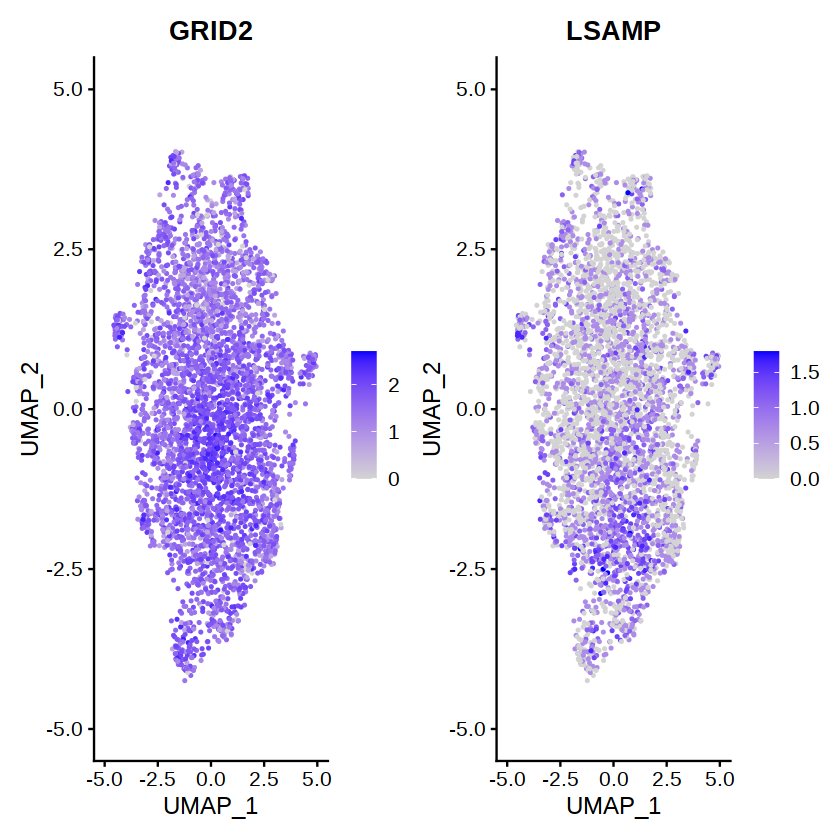

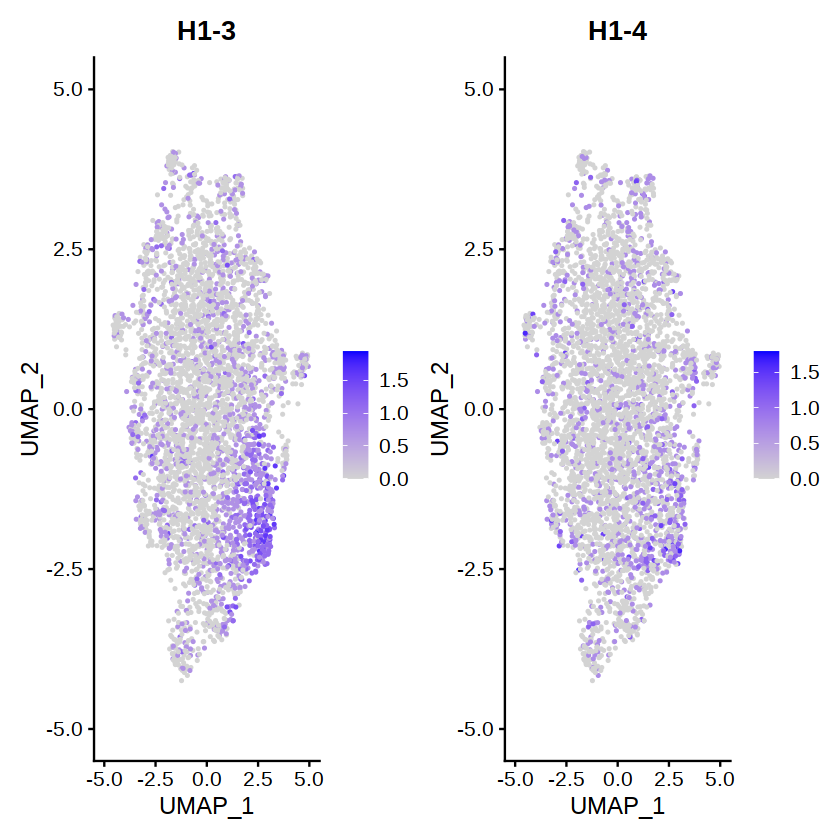

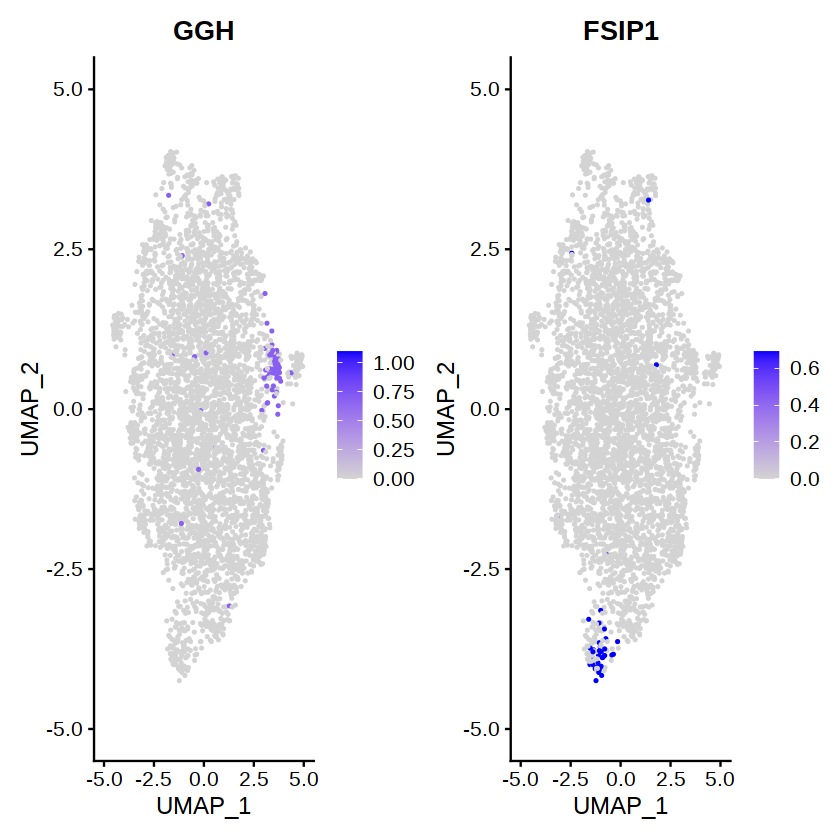

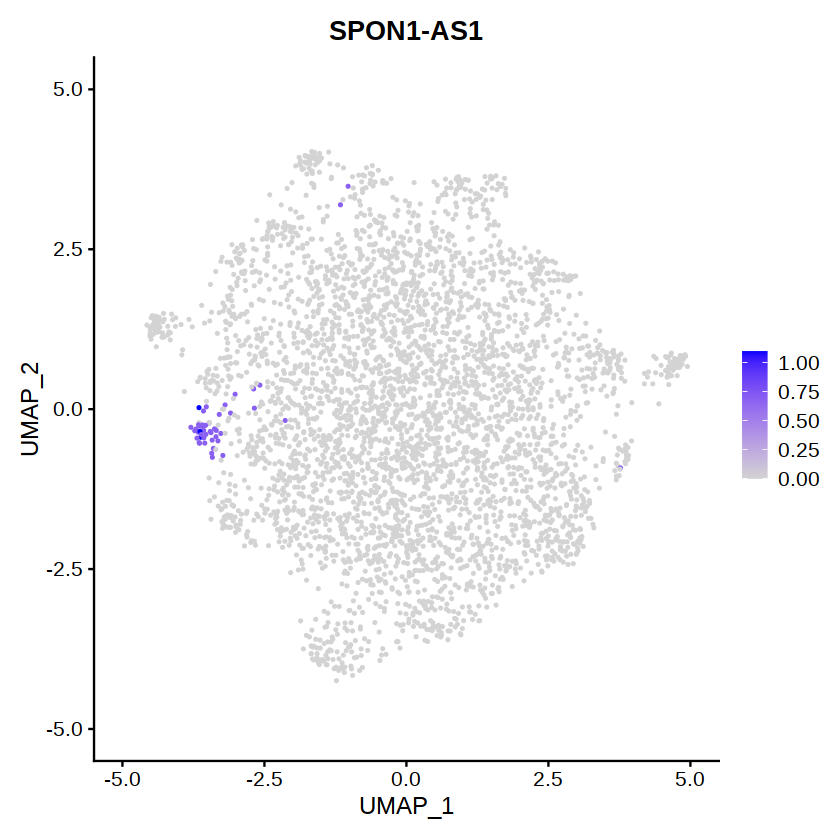

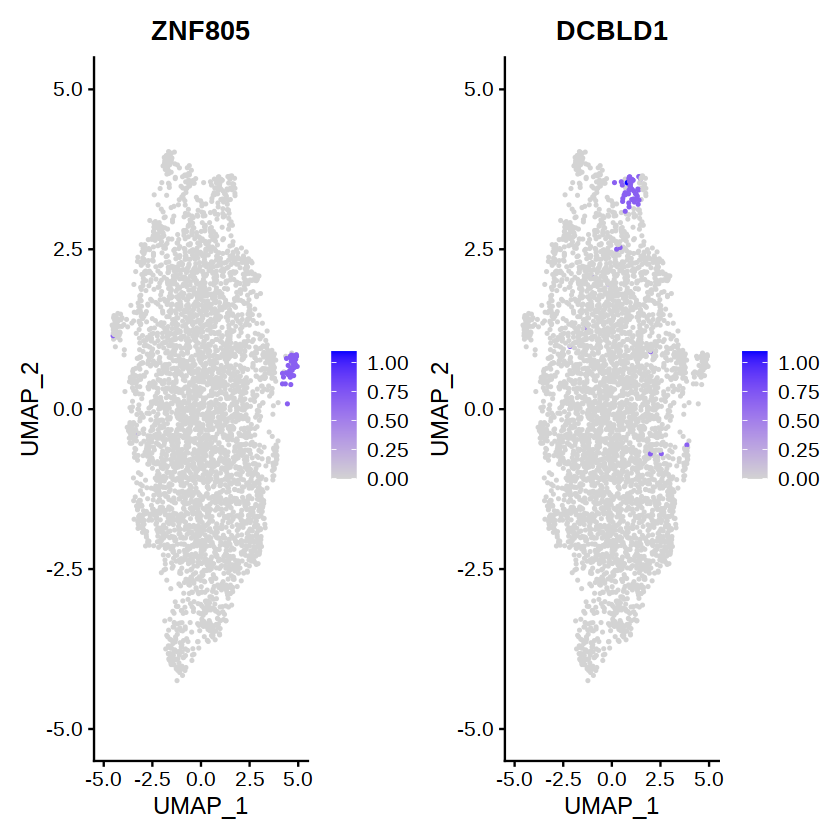

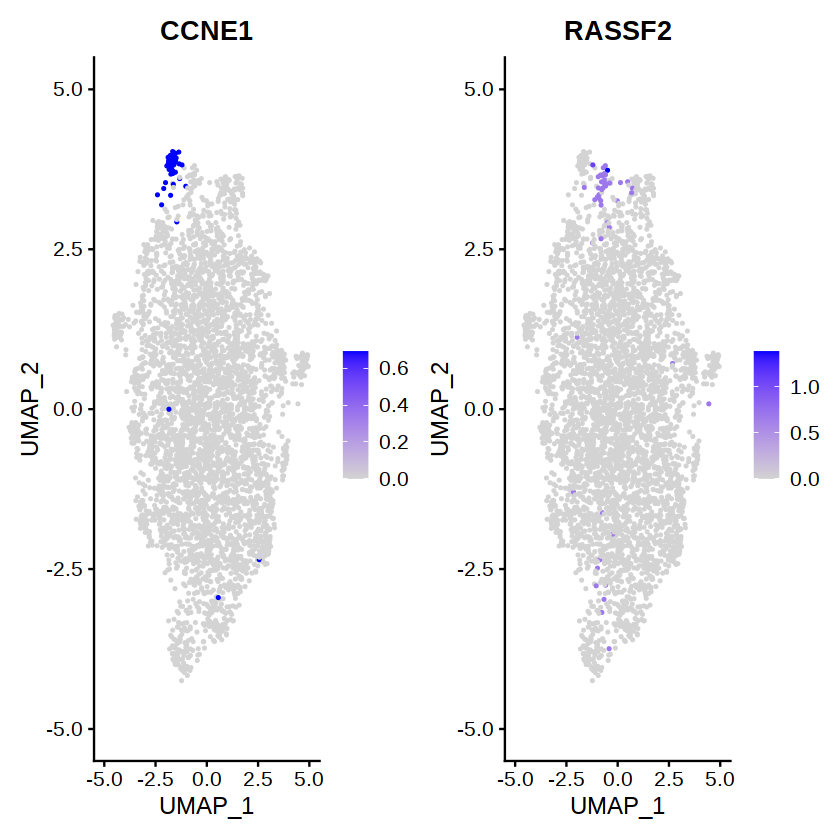

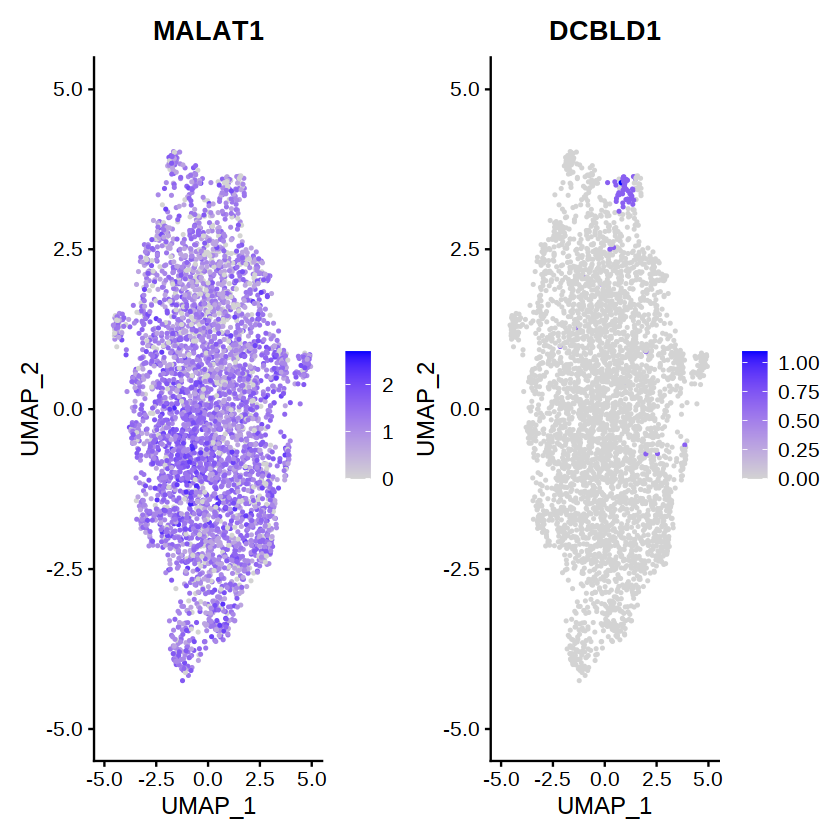

In [264]:
FeaturePlot(rna,features=c("percent.mt"))
FeaturePlot(rna,features=c("nCount_RNA"))
FeaturePlot(rna,features=c("nFeature_RNA"))
FeaturePlot(rna,features=c("GRID2","LSAMP"))
FeaturePlot(rna,features=c("H1-3","H1-4"))
FeaturePlot(rna,features=c("GGH","FSIP1"))
FeaturePlot(rna,features=c("SPON1-AS1"))
FeaturePlot(rna,features=c("ZNF805","DCBLD1"))
FeaturePlot(rna,features=c("CCNE1","RASSF2"))
FeaturePlot(rna,features=c("MALAT1","DCBLD1"))

R1.01,R2.05,R3.95,P1.17 R1.01,R2.07,R3.37,P1.17 R1.01,R2.08,R3.02,P1.17 
                    687                     596                     473 
R1.01,R2.32,R3.12,P1.17 R1.01,R2.32,R3.35,P1.17 R1.01,R2.39,R3.69,P1.17 
                    684                     944                    1006 
R1.01,R2.40,R3.49,P1.17 R1.01,R2.48,R3.12,P1.17 R1.01,R2.48,R3.29,P1.17 
                    933                    1018                     726 
R1.01,R2.96,R3.12,P1.17 R1.01,R2.96,R3.75,P1.17 R1.02,R2.04,R3.70,P1.17 
                   1529                     879                     570 
R1.02,R2.07,R3.51,P1.17 R1.02,R2.07,R3.63,P1.17 R1.02,R2.07,R3.64,P1.17 
                    408                     416                     408 
R1.02,R2.07,R3.73,P1.17 R1.02,R2.07,R3.79,P1.17 R1.02,R2.08,R3.74,P1.17 
                    456                     434                     594 
R1.02,R2.24,R3.14,P1.17 R1.02,R2.28,R3.03,P1.17 R1.02,R2.28,R3.68,P1.17 
                    498                     414                     491 
R1.02,R2.29,R3.78,P1.17 R1.02,R2.32,R3.76,P1.17 R1.02,R2.32,R3.83,P1.17 
                    404                     671                     943 
R1.02,R2.40,R3.75,P1.17 R1.02,R2.45,R3.38,P1.17 R1.02,R2.48,R3.95,P1.17 
                    414                     878                     727 
R1.02,R2.61,R3.55,P1.17 R1.02,R2.63,R3.44,P1.17 R1.02,R2.63,R3.55,P1.17 
                    724                    1991                    1598 
R1.02,R2.67,R3.90,P1.17 R1.02,R2.69,R3.19,P1.17 R1.02,R2.69,R3.65,P1.17 
                    978                    1225                     949 
R1.02,R2.69,R3.68,P1.17 R1.02,R2.70,R3.94,P1.17 R1.02,R2.71,R3.26,P1.17 
                    483                     918                     454 
R1.02,R2.72,R3.22,P1.17 R1.02,R2.72,R3.60,P1.17 R1.02,R2.72,R3.80,P1.17 
                   1309                    1171                     430 
R1.02,R2.72,R3.92,P1.17 R1.02,R2.79,R3.61,P1.17 R1.02,R2.79,R3.68,P1.17 
                   1702                     633                     707 
R1.02,R2.80,R3.38,P1.17 R1.02,R2.84,R3.18,P1.17 R1.02,R2.84,R3.60,P1.17 
                    597                     972                     532 
R1.02,R2.86,R3.29,P1.17 R1.02,R2.88,R3.94,P1.17 R1.02,R2.94,R3.64,P1.17 
                   1860                    1388                    1105 
R1.02,R2.96,R3.48,P1.17 R1.03,R2.05,R3.67,P1.17 R1.03,R2.07,R3.17,P1.17 
                   1187                     926                     680 
R1.03,R2.07,R3.37,P1.17 R1.03,R2.07,R3.64,P1.17 R1.03,R2.07,R3.73,P1.17 
                    779                     495                     606 
R1.03,R2.07,R3.94,P1.17 R1.03,R2.12,R3.51,P1.17 R1.03,R2.17,R3.51,P1.17 
                    465                     774                     891 
R1.03,R2.17,R3.90,P1.17 R1.03,R2.18,R3.71,P1.17 R1.03,R2.20,R3.12,P1.17 
                    639                     430                     584 
R1.03,R2.29,R3.60,P1.17 R1.03,R2.29,R3.79,P1.17 R1.03,R2.31,R3.89,P1.17 
                    559                     488                     600 
R1.03,R2.32,R3.28,P1.17 R1.03,R2.32,R3.71,P1.17 R1.03,R2.35,R3.48,P1.17 
                    645                    1370                     454 
R1.03,R2.36,R3.35,P1.17 R1.03,R2.36,R3.42,P1.17 R1.03,R2.36,R3.83,P1.17 
                    888                     570                     474 
R1.03,R2.37,R3.83,P1.17 R1.03,R2.46,R3.67,P1.17 R1.03,R2.47,R3.02,P1.17 
                    760                    1350                     612 
R1.03,R2.48,R3.55,P1.17 R1.03,R2.54,R3.36,P1.17 R1.03,R2.58,R3.37,P1.17 
                    472                     429                    1394 
R1.03,R2.59,R3.42,P1.17 R1.03,R2.61,R3.69,P1.17 R1.03,R2.62,R3.19,P1.17 
                    582                     660                     722 
R1.03,R2.62,R3.65,P1.17 R1.03,R2.63,R3.36,P1.17 R1.03,R2.63,R3.49,P1.17 
                    598                     435                     458 
R1.03,R2.63,R3.70,P1.17 R1.03,R2.64,R3.17,P1.17 R1.03,R2.6

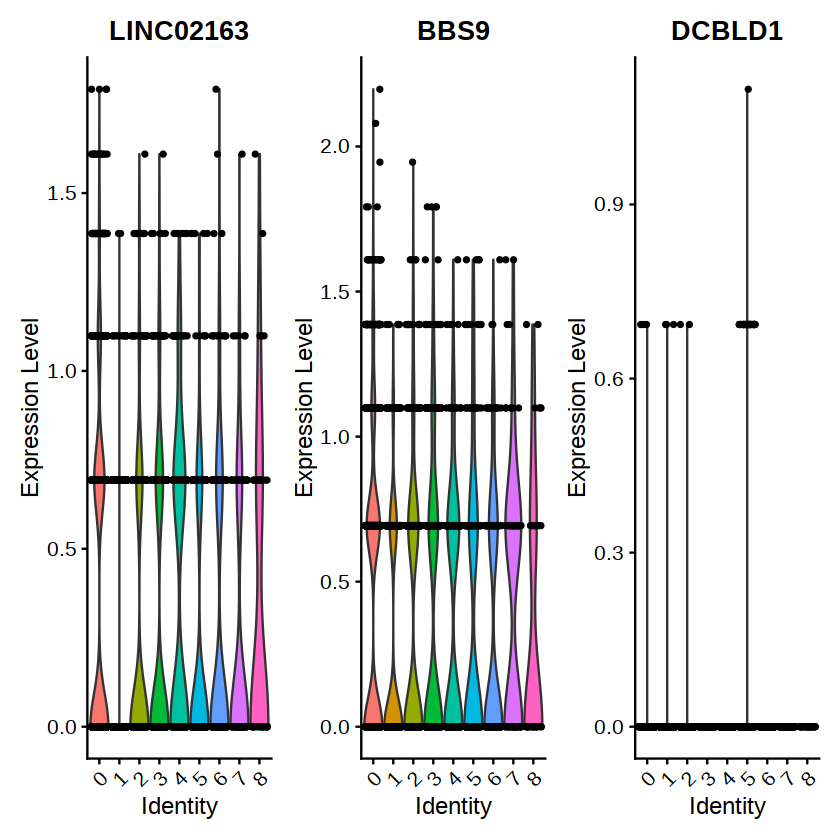

In [150]:
VlnPlot(rna,features=c('LINC02163','BBS9',"DCBLD1"))

In [269]:
plot_seperate_features <- function(object, gene, limit = NULL,ident=NULL,pt.size=0.5,revers.order = F,numcol=NULL, colors =c('#DCD9DE','#870052'), ...){

if(is.null(ident)){
Idents(object) <- 'combined'
}
else{
Idents(object) <- object[[ident]]
}
p <- vector("list", length = (length(gene)*length(levels(Idents(object)))))
for(g in 1:(length(gene))){
if(is.null(limit)==T){
for(i in 1:length(levels(Idents(object)))){
j <- i+((g-1)*length(levels(Idents(object))))
p[[j]] <- FeaturePlot(object, cells = WhichCells(object,idents = levels(Idents(object))[i]), features = gene[g],order = T,cols = colors, pt.size = pt.size, sort.cell = T,...) +
scale_color_gradient(low = colors[1], high = colors[2], limits = c(0,ceiling(max(object@assays$RNA@data[gene[g],]))),oob = squish) +
ggtitle(paste(levels(Idents(object))[i],gene[g],sep=", "))
}
}
else{
for(i in 1:length(levels(Idents(object)))){
j <- i+((g-1)*length(levels(Idents(object))))
p[[j]] <- FeaturePlot(object, cells = WhichCells(object,idents = levels(Idents(object))[i]), features = gene[g],order = T,cols = colors, pt.size = pt.size, sort.cell = T,...) +
scale_color_gradient(low = colors[1], high = colors[2], limits = limit,oob = squish) +
ggtitle(paste(levels(Idents(object))[i],gene[g],sep=", "))
}
}
}
#correct axis in all plots
y_axis_max <- 1:length(p)
y_axis_min <- 1:length(p)
x_axis_max <- 1:length(p)
x_axis_min <- 1:length(p)
for(i in 1:length(p)){
x_axis_max[i] <- max(layer_scales(p[[i]])$x$range$range)
x_axis_min[i] <- min(layer_scales(p[[i]])$x$range$range)
y_axis_max[i] <- max(layer_scales(p[[i]])$y$range$range)
y_axis_min[i] <- min(layer_scales(p[[i]])$y$range$range)
}
for(i in 1:length(p)){
p[[i]] <- p[[i]]+coord_equal(xlim=c(min(x_axis_min),max(x_axis_max)),ylim=c(min(y_axis_min),max(y_axis_max)))
}
if(revers.order==T) p <- rev(p)
gridExtra::grid.arrange(grobs = p,ncol=numcol)
}`

In [270]:
plot_seperate_features(rna,c("CCNE1","RASSF2","MALAT1","DCBLD1"))

Warning message:
“The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality.”


ERROR: Error in scale_color_gradient(low = colors[1], high = colors[2], limits = c(0, : object 'squish' not found


In [ ]:
FeaturePlot(rna,features=c("percent.mt"))
FeaturePlot(rna,features=c("nCount_RNA"))
FeaturePlot(rna,features=c("nFeature_RNA"))
FeaturePlot(rna,features=c("GRID2","LSAMP"))
FeaturePlot(rna,features=c("H1-3","H1-4"))
FeaturePlot(rna,features=c("GGH","FSIP1"))
FeaturePlot(rna,features=c("SPON1-AS1"))
FeaturePlot(rna,features=c("ZNF805","DCBLD1"))
FeaturePlot(rna,features=c("CCNE1","RASSF2","MALAT1","DCBLD1")